# Import and append the data

In [239]:
import pandas as pd
import time
import sys
import datetime as datetime

#Indlæs data og formater dato formatet
df_1pt= pd.read_pickle('both1.pkl')
df_2pt= pd.read_pickle('both2.pkl')
AL_df=df_1pt.append(df_2pt)
AL_df.set_index(pd.DatetimeIndex(AL_df['date']), inplace=True)
del AL_df['date']
AL_df

,job_title,job_describ,city,company
date,,,,
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,Til vores krævende og kompetente kunder som be...,Region Midtjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,På et marked hvor virksomheden i forvejen er e...,Region Midtjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,På et marked hvor virksomheden i forvejen er e...,Sydjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,Til vores krævende og kompetente kunder som be...,Region Nordjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,Til vores krævende og kompetente kunder som be...,Sydjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,På et marked hvor virksomheden i forvejen er e...,Region Nordjylland,ABB A/S
2009-12-31,Stud.jur. med interesse for personalejura,Du skal være med i et team der arbejder med pe...,Kgs. Lyngby,BRFkredit a/s
2009-12-31,Leder til bofællesskab,Til bofællesskabet Ganerbo i Skjern søges enga...,Skjern,Bofællesskabet Ganerbo
2009-12-31,Account Manager - Service Provider (English/Da...,The SP challenger & New Media team is seeking ...,København,Cisco


# Sammenlign BNP med joblisting

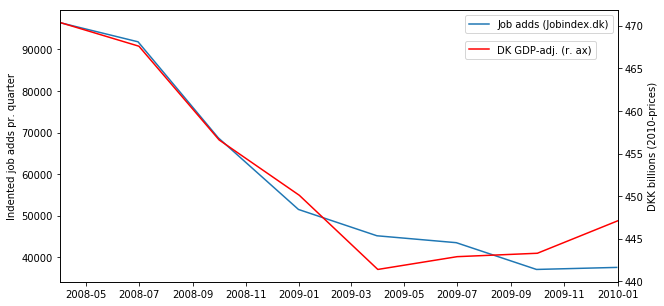

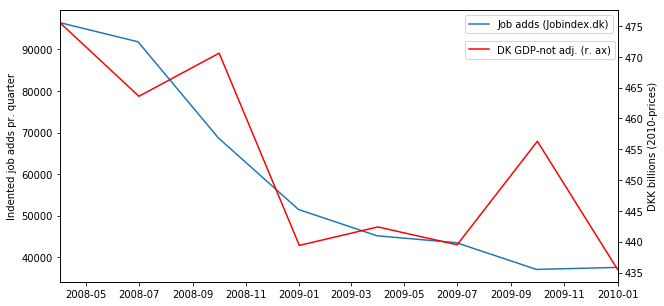

In [152]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


#Gruppering af datoer pr. kvartal samt udarbejdelse af graf

g_1 = AL_df.groupby(pd.Grouper(freq="Q"))  # DataFrameGroupBy (grouped by quaters)
quater_frq=g_1.count()['city']

#import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


#Gruppering af datoer pr. kvartal samt udarbejdelse af graf

g_1 = AL_df.groupby(pd.Grouper(freq="Q"))  # DataFrameGroupBy (grouped by quaters)
quater_frq=g_1.count()['city']


#BNP_seasonally_adjust.csv
AL_BNP=pd.read_csv('C:/Users/ander/Desktop/group19/Eksamensprojekt/BNP_seasonally_adjust.csv')
bnp=AL_BNP.iloc[:,4:6]
bnp=bnp[(bnp['TIME']<'2010Q2')]
bnp=bnp[(bnp['TIME']>'2008Q1')]
bnp.set_index(pd.DatetimeIndex(bnp['TIME']), inplace=True)
del bnp['TIME']


#Figure for kvartalsvis BNP + Jobindex (Fig.3)
fig, ax1 =plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(quater_frq, label='Job adds (Jobindex.dk)')
ax1.legend(loc="upper right")
ax2.plot(bnp, label='DK GDP-adj. (r. ax)', color='r',)
ax2.legend(loc=[0.727,0.82])
ax1.set_ylabel("Indented job adds pr. quarter")
ax2.set_ylabel("DKK billions (2010-prices)")
plt.xlim(['2008-04','2010-01'])
plt.savefig('Fig3_1.png')
plt.show()


# BNP ukorrigerede faste priser
AL_BNP=pd.read_csv('C:/Users/ander/Desktop/group19/Eksamensprojekt/dst/test.csv')
bnp=AL_BNP.iloc[:,4:6]
bnp=bnp[(bnp['TIME']<'2010Q2')]
bnp=bnp[(bnp['TIME']>'2008Q1')]
bnp.set_index(pd.DatetimeIndex(bnp['TIME']), inplace=True)
del bnp['TIME']


#Figure for kvartalsvis BNP + Jobindex (Fig.3)
fig, ax1 =plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(quater_frq, label='Job adds (Jobindex.dk)')
ax1.legend(loc="upper right")
ax2.plot(bnp, label='DK GDP-not adj. (r. ax)', color='r',)
ax2.legend(loc=[0.727,0.82])
ax1.set_ylabel("Indented job adds pr. quarter")
ax2.set_ylabel("DKK billions (2010-prices)")
plt.xlim(['2008-04','2010-01'])
plt.savefig('Fig3_2.png')
plt.show()



# Tester hvor mange hver vsh. har i perioden

In [240]:
#Annoncer i alt efter vsh.
from collections import Counter
AL_df08=AL_df[AL_df.index<'2009-01-01']
count08= pd.Series(AL_df08['company'].str.split(',').map(Counter).sum())


AL_df09=AL_df[(AL_df.index<'2010-01-01') & (AL_df.index>'2009-01-01')]
count09 = pd.Series(AL_df09['company'].str.split(',').map(Counter).sum())


AL_df10=AL_df[(AL_df.index<'2011-01-01') & (AL_df.index>'2010-01-01')]
count10 = pd.Series(AL_df10['company'].str.split(',').map(Counter).sum())
firmadict10=count.to_dict()

AL_df11=AL_df[(AL_df.index<'2012-01-01') & (AL_df.index>'2011-01-01')]
count11= pd.Series(AL_df11['company'].str.split(',').map(Counter).sum())

ABB A/S                                                         6
BRFkredit a/s                                                   1
Bofællesskabet Ganerbo                                          1
Cisco                                                           1
DAMP Sundhedscenter                                             1
Elysee Dental ApS                                               1
Esbjerg Kommune                                                 2
Fanø Kran-Service A/S                                           1
Farmakonom                                                      1
Forum Advokater                                                 1
GN Netcom A/S                                                   1
Haderslev kommune                                               9
IT-Jobbank                                                     13
Malling Varmeværk A.m.b.a.                                      1
Procter & Gamble                                                1
Regionshos

[Text(0,0.5,'Year'), Text(0.5,0,'Number of job advertisements')]

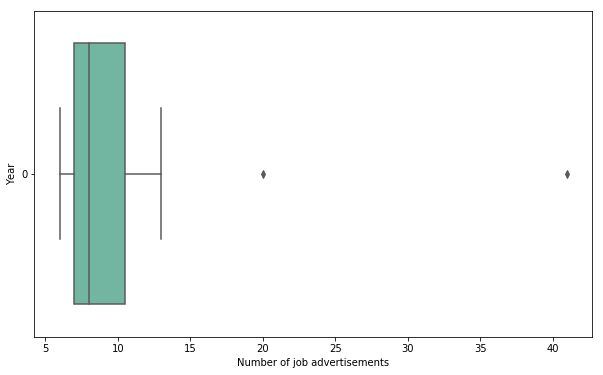

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt
headeryear=[2008,2009,2010,2011]
minant=5
AL_alldf=pd.DataFrame(count08[count08>minant])
AL_alldf=pd.concat([AL_alldf,count09[count09>minant]])
AL_alldf=pd.concat([AL_alldf,count10[count10>minant]])
AL_alldf=pd.concat([AL_alldf,count11[count11>minant]])
#AL_alldf.columns=headeryear


fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(data=AL_alldf, orient="h", palette='Set2')
ax.set(xlabel='Number of job advertisements', ylabel='Year')


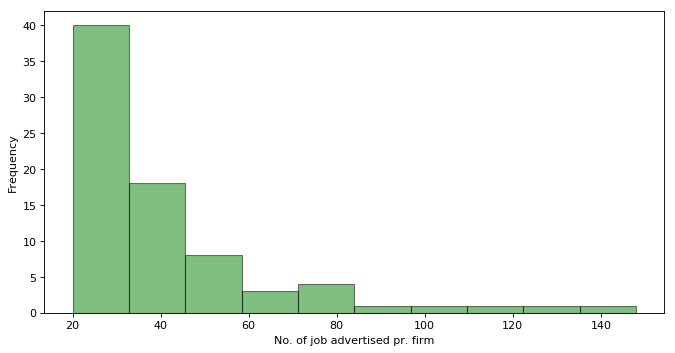

In [62]:
#Histogram
'''import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Laver en dict til ovenstående afsnit
n_jobs=count.sort_values(ascending=False)
job_count=n_jobs[n_jobs>=20]

#Creating a histogram
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='b')
plt.xlabel('No. of job advertised pr. firm')
plt.ylabel('Frequency')
plt.hist(job_count, bins=10, alpha=0.5,color='g', histtype='bar', ec='black')
plt.savefig('Fig4.png')
plt.show() 

'''

# Bearbejd virksomheder i annonceringsdata

In [277]:
#Gruppering gruppering mht. Vsh og dato i jobannonce delen
import pandas as pd
pd.options.display.max_rows=1200


List=['Maersk','Carlsb', 'Colopla','Danske Ba','DSV','Jyske B','Nordea',\
      'Novo N','Novozy','Vestas','Tryg F','H. Lund', 'Alm. Br','SAS']           

month_frq=pd.DataFrame()


for i in List:
    C20list=AL_df[AL_df['company'].astype(str).str[0:len(i)]==i]
    gg = C20list.groupby(pd.Grouper(freq="M")) # DataFrameGroupBy (grouped by Month)
    month_frq=pd.concat([month_frq,gg.count()['company']], axis=1) 

c20job_headers=['Maersk','Carlsberg', 'Coloplast','Danske Bank','DSV','Jyske Bank','Nordea','Novo Nordisk','Novozymes','Vestas', 'Tryg','H. Lundbeck','Alm. Brand', 'SAS']

month_frq.columns=c20job_headers

# TAbel over annonceringer
jobs_sum=month_frq.describe().round(1).T
del jobs_sum['count']
jobs_sum

,mean,std,min,25%,50%,75%,max
Maersk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carlsberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coloplast,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Danske Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jyske Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nordea,3.0,NaN,3.0,3.0,3.0,3.0,3.0
Novo Nordisk,10.0,NaN,10.0,10.0,10.0,10.0,10.0
Novozymes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vestas,41.0,NaN,41.0,41.0,41.0,41.0,41.0


# Indlæs aktiedata lokalt og tilpasning

In [290]:
tickers={'MAERSK_B':'CSE3201','CARL_B':'CSE1596',\
         'COLO_B':'CSE3203','DANSKE':'CSE1586','DSV':'CSE3415',\
         'JYSK':'CSE1587','NDA_DKK':'CSE4861','NOVO_B':'CSE1158',\
         'NZYM_B':'CSE11273','TRYG':'CSE31315','VWS':'CSE3258','LUN':'CSE3853',\
         'ALMB':'CSE3340','SAS_DKK':'CSE13584'}


path_csv="C:/Users/ander/Desktop/group19/Eksamensprojekt/omx_c20/"

df_c20=pd.DataFrame()

for i in tickers:
    nasd_csv=path_csv +str(i)+ "-2006-01-02-2018-08-28.csv"
    df= pd.read_csv(nasd_csv,sep=";",header=1, decimal=",")
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True) #Setting the date as index
    df_o=pd.DataFrame(df)
    df_r=df_o['Closing price'] # Getting only the closing price
    df_c20=pd.concat([df_c20,df_r], axis=1) 

headers=c20job_headers
df_c20.columns=headers
df_c20 #Closing prices with headersfor the chosen stock

#Aktiekurs EOM
df_c20=df_c20.groupby(pd.Grouper(freq='M')).nth(0) #getting the closing price of the last trading day in the month
c20_stockp=df_c20.iloc[24:48,:] #Reguler tidsafgrænsning

#Laver en gns. aktiekurs EOM
df_c20mean=df_c20.resample('M').mean()
c20_stockpmean=df_c20mean.iloc[24:48,:] #Reguler tidsafgrænsning

#Tabel 1 - stock prices 
c20p_sum=c20_stockp.describe().round().T
del c20p_sum['count']
print(c20p_sum)

                mean     std     min     25%     50%      75%      max
Maersk        8138.0  2207.0  5140.0  6495.0  7200.0  10255.0  11780.0
Carlsberg      360.0   113.0   167.0   265.0   368.0    448.0    525.0
Coloplast       80.0     7.0    68.0    74.0    80.0     83.0     93.0
Danske Bank    110.0    45.0    32.0    78.0   115.0    137.0    187.0
DSV             82.0    23.0    41.0    65.0    80.0    100.0    122.0
Jyske Bank     208.0    80.0    89.0   141.0   187.0    281.0    371.0
Nordea          56.0    17.0    28.0    42.0    53.0     68.0     84.0
Novo Nordisk    61.0     4.0    54.0    57.0    62.0     64.0     68.0
Novozymes       90.0     9.0    76.0    84.0    88.0     95.0    117.0
Vestas          70.0     7.0    58.0    65.0    70.0     74.0     84.0
Tryg           426.0   135.0   244.0   343.0   384.0    516.0    684.0
H. Lundbeck    112.0    10.0    94.0   103.0   113.0    119.0    136.0
Alm. Brand      57.0    32.0    22.0    30.0    41.0     89.0    114.0
SAS   

# Printer grafer for vsh. job annoncer + aktie kurser

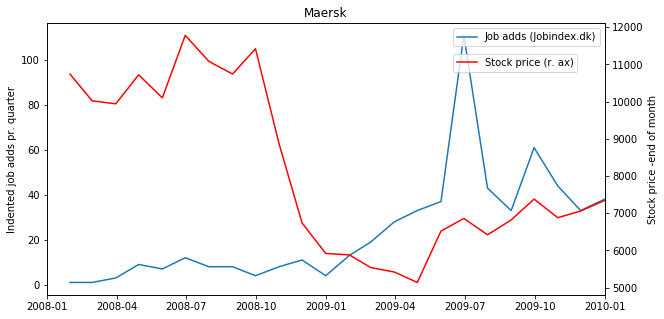

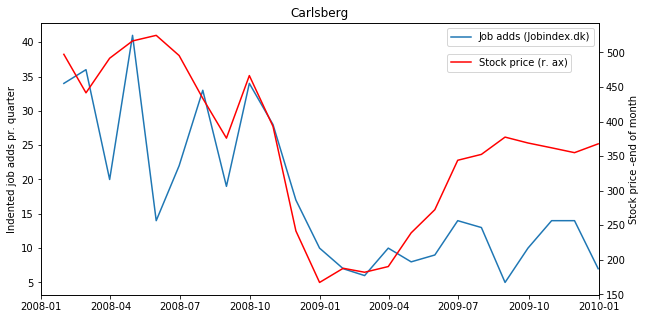

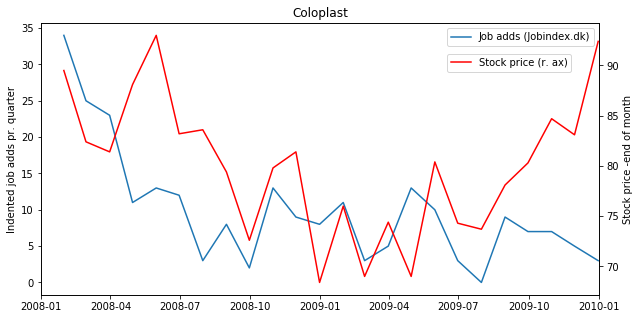

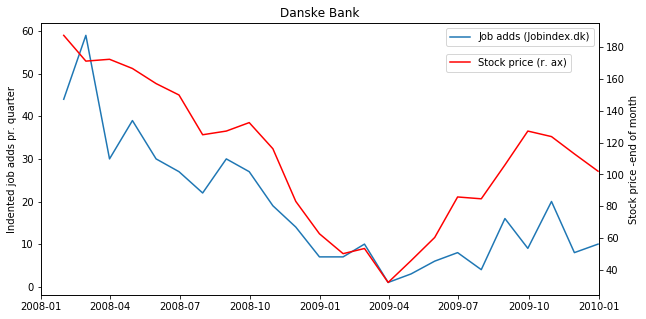

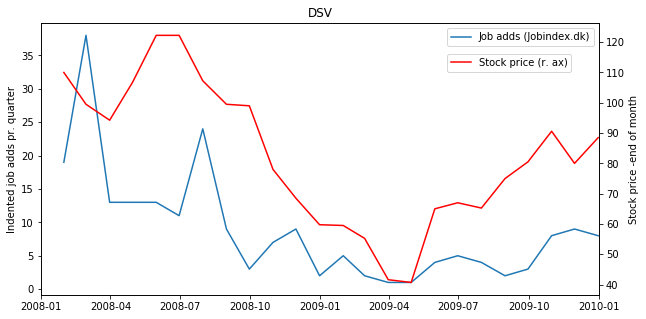

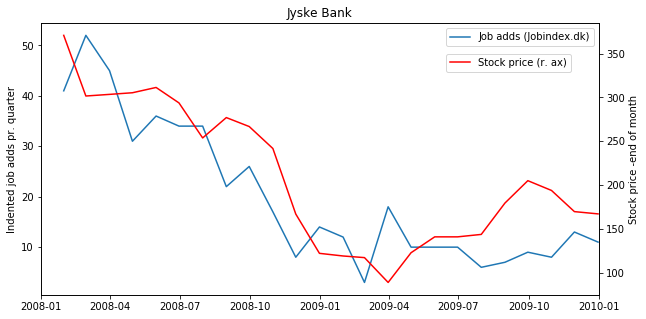

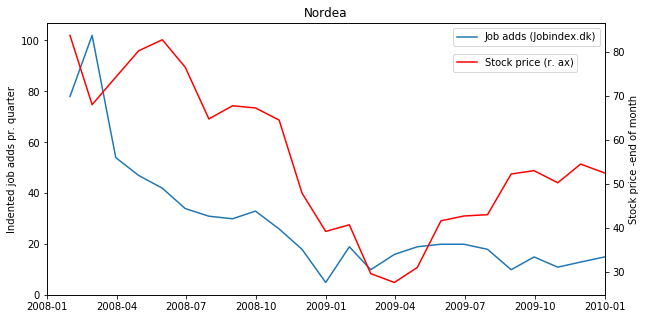

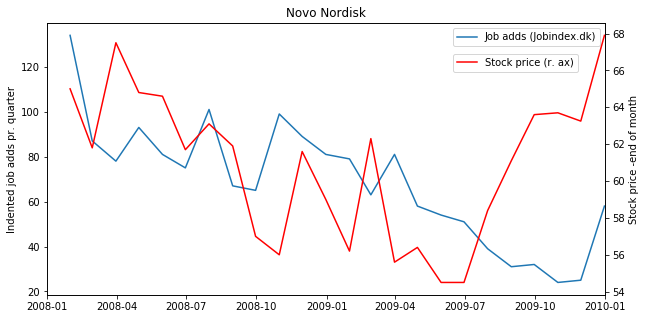

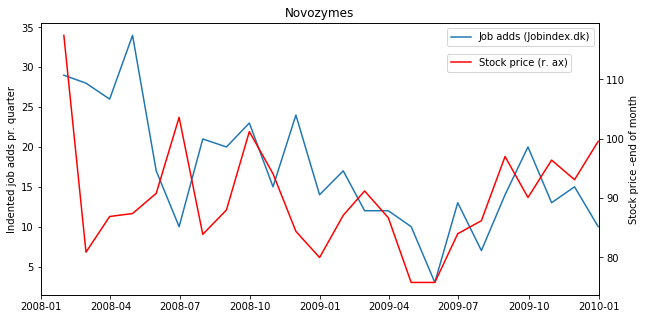

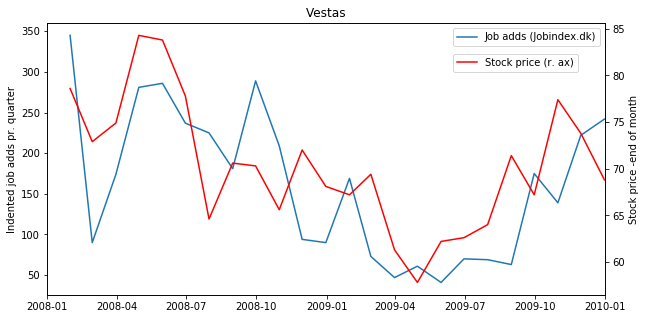

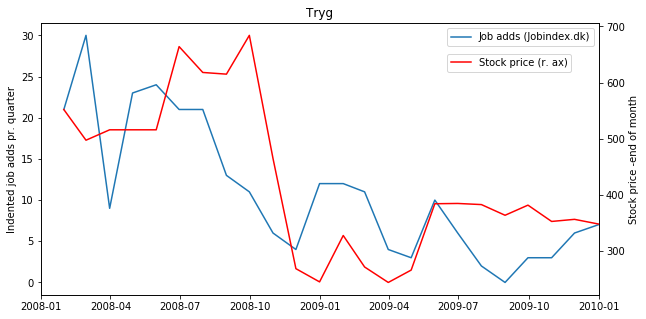

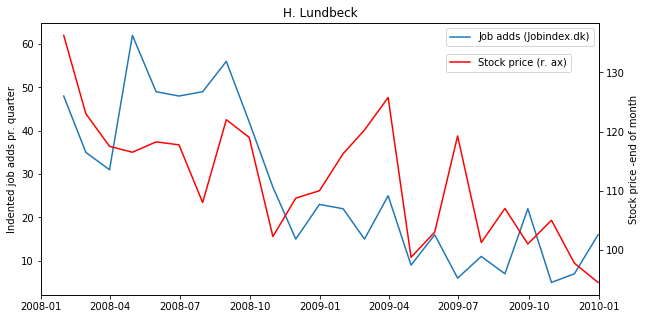

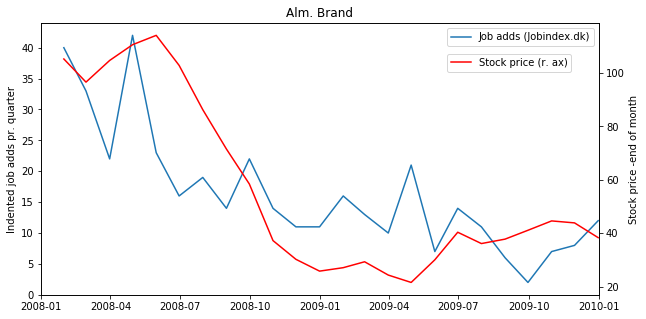

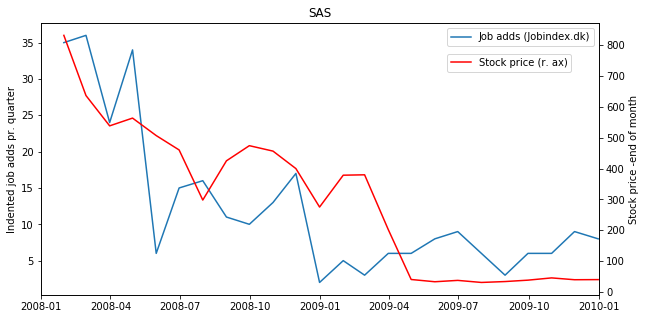

In [186]:

for i in month_frq.columns:
    fig, ax1 =plt.subplots(figsize=(10,5))
    ax2 = ax1.twinx()
    ax1.plot(month_frq[str(i)], label='Job adds (Jobindex.dk)')
    ax1.legend(loc="upper right")
    ax2.plot(c20_stockp[str(i)], label='Stock price (r. ax)', color='r',)
    ax2.legend(loc=[0.727,0.82])
    ax1.set_ylabel("Indented job adds pr. quarter")
    ax2.set_ylabel("Stock price -end of month")
    plt.xlim(['2008-01','2010-01'])
    plt.title(i)
    plt.savefig('Fig'+str(i)+'.png')
    plt.show()


    

In [217]:
#Definer ny tabel til Modellering
jobs_ialt=month_frq.iloc[:,1:]
jobs_ialt.columns=['Carlsberg_jobs', 'Coloplast_jobs','Danske_Bank_jobs','DSV_jobs','Jyske_Bank_jobs','Nordea_jobs',\
                   'Novo_Nordisk_jobs','Novozymes_jobs','Vestas_jobs', 'Tryg_jobs','H_Lundbeck_jobs','Alm_Brand_jobs', 'SAS_jobs']

alt_ialt=c20_stockp.iloc[:,1:]
alt_ialt=pd.concat([alt_ialt,jobs_ialt],axis=1)
alt_ialt.to_pickle('job_kurser.pkl')